# LV1 – Obrada teksta i Part-of-Speech (POS) označavanje
### Laboratorijska vježba 1
**Tema:** Osnove obrade prirodnog jezika pomoću biblioteka spaCy i NLTK

Ovaj notebook sadrži teorijski uvod, osnovne korake obrade teksta te zadatke za samostalni rad. Studenti mogu birati žele li koristiti *spaCy* ili *NLTK* biblioteku pri rješavanju zadataka.

## Ciljevi vježbe
- Upoznati osnovne korake obrade prirodnog jezika (NLP).
- Primijeniti biblioteke **spaCy** i **NLTK** na obradu teksta.
- Razumjeti i implementirati procese tokenizacije, uklanjanja zaustavnih riječi, lematizacije i POS označavanja.
- Razviti sposobnost analize i interpretacije rezultata obrade teksta.

## 1. Instalacija potrebnih biblioteka

In [1]:
!pip install spacy nltk matplotlib pandas

!python -m spacy download en_core_web_sm

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 108.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## 2. Tokenizacija
**Opis:** Tokenizacija je proces razdvajanja teksta na manje jedinice – tokene (riječi, interpunkcijske znakove itd.).

U nastavku su prikazana dva načina tokenizacije: pomoću *spaCy* i pomoću *NLTK*.

In [2]:
nlp = spacy.load('en_core_web_sm')
text = 'Natural Language Processing enables computers to understand human language.'
doc = nlp(text)
for token in doc:
    print(token.text)

Natural
Language
Processing
enables
computers
to
understand
human
language
.


In [3]:
nltk.download('punkt')
nltk.download('punkt_tab')
text = 'Natural Language Processing enables computers to understand human language.'
tokens = word_tokenize(text)
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['Natural', 'Language', 'Processing', 'enables', 'computers', 'to', 'understand', 'human', 'language', '.']


### Zadatak 1
Upiši vlastiti tekst i izvrši tokenizaciju pomoću obje biblioteke.

In [15]:
my_text = "The quick brown fox jumps over the lazy dog."
print(f"Originalni tekst: {my_text}\n")

print("--- spaCy Tokenizacija (hrvatski tekst) ---")
try:
    nlp_hr = spacy.load('en_core_web_sm')
except OSError:
    print("Hrvatski spaCy model 'en_core_web_sm' nije pronađen. Preuzimam ga sada...")
    !python -m spacy download en_core_web_sm
    nlp_hr = spacy.load('en_core_web_sm')

doc_hr = nlp_hr(my_text)

print("Tokeni (spaCy):")
for token in doc_hr:
    print(token.text)
print("-" * 50)

print("--- NLTK Tokenizacija (hrvatski tekst) ---")

try:
    tokens_hr_nltk = word_tokenize(my_text)
except LookupError:
    print("NLTK 'punkt' resursi nisu pronađeni. Preuzimam ih sada...")
    nltk.download('punkt')
    tokens_hr_nltk = word_tokenize(my_text)

print("Tokeni (NLTK):")
print(tokens_hr_nltk)
print("-" * 50)

Originalni tekst: The quick brown fox jumps over the lazy dog.

--- spaCy Tokenizacija (hrvatski tekst) ---
Tokeni (spaCy):
The
quick
brown
fox
jumps
over
the
lazy
dog
.
--------------------------------------------------
--- NLTK Tokenizacija (hrvatski tekst) ---
Tokeni (NLTK):
['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.']
--------------------------------------------------


## 3. Uklanjanje zaustavnih riječi (Stopwords)
Zaustavne riječi su česte riječi koje ne doprinose značenju teksta (npr. the, is, in...).

In [7]:
doc = nlp(text)
filtered_spacy = [token.text for token in doc if not token.is_stop]
print(filtered_spacy)

['Natural', 'Language', 'Processing', 'enables', 'computers', 'understand', 'human', 'language', '.']


In [8]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_nltk = [word for word in tokens if word.lower() not in stop_words]
print(filtered_nltk)

['Natural', 'Language', 'Processing', 'enables', 'computers', 'understand', 'human', 'language', '.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Zadatak 2
Ukloni zaustavne riječi iz vlastitog teksta pomoću obje biblioteke.

In [17]:
# Provjerite je li `my_croatian_text` definiran iz prethodnog zadatka
# Ako nije, možete ga definirati ovdje ponovno ili pokrenuti prethodnu ćeliju
# my_croatian_text = "Ovo je primjer teksta na hrvatskom jeziku za tokenizaciju. Cilj je pokazati kako obje biblioteke obrađuju hrvatske riječi i interpunkciju, kao i simbole poput zagrada (i slično) ili apostrofa (npr. 'tekst')."

# --- Uklanjanje zaustavnih riječi sa spaCy (za hrvatski tekst) ---
print("--- spaCy uklanjanje zaustavnih riječi (hrvatski tekst) ---")
try:
    nlp_hr = spacy.load('en_core_web_sm')
except OSError:
    print("Hrvatski spaCy model 'en_core_web_sm' nije pronađen. Preuzimam ga sada...")
    !python -m spacy download en_core_web_sm
    nlp_hr = spacy.load('en_core_web_sm')

doc_hr_stopwords = nlp_hr(my_text)
filtered_spacy_hr = [token.text for token in doc_hr_stopwords if not token.is_stop and not token.is_punct]
print("Filtrirani tokeni (spaCy):")
print(filtered_spacy_hr)
print("-" * 50)

print("--- NLTK uklanjanje zaustavnih riječi (hrvatski tekst) ---")

try:
    # Try to load Croatian stopwords directly
    stop_words_hr = set(stopwords.words('english'))
except LookupError:
    print("NLTK 'english' stopwords resursi nisu pronađeni. Preuzimam ih sada...")
    stop_words_hr = set(stopwords.words('english'))

filtered_nltk_hr = [word for word in tokens_hr_nltk if word.lower() not in stop_words_hr and word.isalnum()]
print("Filtrirani tokeni (NLTK):")
print(filtered_nltk_hr)
print("-" * 50)

--- spaCy uklanjanje zaustavnih riječi (hrvatski tekst) ---
Filtrirani tokeni (spaCy):
['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']
--------------------------------------------------
--- NLTK uklanjanje zaustavnih riječi (hrvatski tekst) ---
Filtrirani tokeni (NLTK):
['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']
--------------------------------------------------


## 4. Lematizacija
Lematizacija svodi riječi na osnovni oblik (lemu).

In [18]:
#Primjer: Lemmatizacija sa spaCy
for token in doc:
    print(f'{token.text:15} → {token.lemma_}')

Natural         → Natural
Language        → Language
Processing      → processing
enables         → enable
computers       → computer
to              → to
understand      → understand
human           → human
language        → language
.               → .


In [19]:
#Primjer: Lemmatizacija s NLTK
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
pos_tags = pos_tag(tokens)
def get_wordnet_pos(tag):
    if tag.startswith('J'): return wordnet.ADJ
    elif tag.startswith('V'): return wordnet.VERB
    elif tag.startswith('N'): return wordnet.NOUN
    elif tag.startswith('R'): return wordnet.ADV
    else: return wordnet.NOUN
lemmas = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
print(lemmas)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


['Natural', 'Language', 'Processing', 'enable', 'computer', 'to', 'understand', 'human', 'language', '.']


### Zadatak 3
Primijeni lematizaciju na vlastiti tekst i usporedi rezultate između spaCy i NLTK.

In [23]:
# Define the custom text (now in English and shorter)
my_text_en = "The quick brown foxes are jumping over the lazy dogs."

print(f"Originalni tekst: {my_text_en}\n")

# --- spaCy Lemmatization (for English text) ---
print("--- spaCy Lematizacija (engleski tekst) ---")
try:
    nlp_en = spacy.load('en_core_web_sm')
except OSError:
    print("Engleski spaCy model 'en_core_web_sm' nije pronađen. Preuzimam ga sada...")
    !python -m spacy download en_core_web_sm
    nlp_en = spacy.load('en_core_web_sm')

doc_en_lemmatization = nlp_en(my_text_en)

print("Leme (spaCy):")
for token in doc_en_lemmatization:
    print(f'{token.text:15} -> {token.lemma_}')
print("-" * 50)

# --- NLTK Lemmatization (for English text) ---
print("--- NLTK Lematizacija (engleski tekst) ---")

# Ensure NLTK resources are downloaded
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("NLTK 'punkt' resursi nisu pronađeni. Preuzimam ih sada...")
    nltk.download('punkt')
try:
    nltk.data.find('taggers/averaged_perceptron_tagger')
except LookupError:
    print("NLTK 'averaged_perceptron_tagger' resursi nisu pronađeni. Preuzimam ih sada...")
    nltk.download('averaged_perceptron_tagger')
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    print("NLTK 'wordnet' resursi nisu pronađeni. Preuzimam ih sada...")
    nltk.download('wordnet')

tokens_en_nltk = word_tokenize(my_text_en)

pos_tags_en_nltk = pos_tag(tokens_en_nltk)

def get_wordnet_pos(tag):
    if tag.startswith('J'): return wordnet.ADJ
    elif tag.startswith('V'): return wordnet.VERB
    elif tag.startswith('N'): return wordnet.NOUN
    elif tag.startswith('R'): return wordnet.ADV
    else: return wordnet.NOUN

lemmatizer = WordNetLemmatizer()
lemmas_en_nltk = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags_en_nltk]

print("Leme (NLTK):")
print(lemmas_en_nltk)
print("-" * 50)

print("\n--- Usporedba rezultata ---")
print("Za engleski jezik, spaCy i NLTK (s WordNetLemmatizerom) često daju slične, vrlo dobre rezultate, jer je WordNet primarno engleski leksikon. Ipak, spaCy-evi modeli su obično robusniji i brži.")

Originalni tekst: The quick brown foxes are jumping over the lazy dogs.

--- spaCy Lematizacija (engleski tekst) ---
Leme (spaCy):
The             -> the
quick           -> quick
brown           -> brown
foxes           -> fox
are             -> be
jumping         -> jump
over            -> over
the             -> the
lazy            -> lazy
dogs            -> dog
.               -> .
--------------------------------------------------
--- NLTK Lematizacija (engleski tekst) ---
NLTK 'wordnet' resursi nisu pronađeni. Preuzimam ih sada...
Leme (NLTK):
['The', 'quick', 'brown', 'fox', 'be', 'jump', 'over', 'the', 'lazy', 'dog', '.']
--------------------------------------------------

--- Usporedba rezultata ---
Za engleski jezik, spaCy i NLTK (s WordNetLemmatizerom) često daju slične, vrlo dobre rezultate, jer je WordNet primarno engleski leksikon. Ipak, spaCy-evi modeli su obično robusniji i brži.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 5. POS (Part-of-Speech) označavanje
POS označavanje dodjeljuje gramatičku ulogu svakoj riječi (imenica, glagol, pridjev, prilog...).

In [24]:
for token in doc:
    print(f'{token.text:15} → {token.pos_:6} ({token.tag_})')

Natural         → PROPN  (NNP)
Language        → PROPN  (NNP)
Processing      → NOUN   (NN)
enables         → VERB   (VBZ)
computers       → NOUN   (NNS)
to              → PART   (TO)
understand      → VERB   (VB)
human           → ADJ    (JJ)
language        → NOUN   (NN)
.               → PUNCT  (.)


In [25]:
pos_tags = pos_tag(tokens)
for word, tag in pos_tags:
    print(f'{word:15} → {tag}')

Natural         → JJ
Language        → NNP
Processing      → NNP
enables         → VBZ
computers       → NNS
to              → TO
understand      → VB
human           → JJ
language        → NN
.               → .


### Zadatak 4
Izdvoji sve imenice i glagole iz svog teksta pomoću jedne od biblioteka.

In [28]:
my_text_en = "The quick brown foxes are jumping over the lazy dogs."

print(f"Originalni tekst: {my_text_en}\n")

try:
    nlp_en = spacy.load('en_core_web_sm')
except OSError:
    print("Engleski spaCy model 'en_core_web_sm' nije pronađen. Preuzimam ga sada...")
    !python -m spacy download en_core_web_sm
    nlp_en = spacy.load('en_core_web_sm')

doc_pos = nlp_en(my_text_en)

nouns = []
verbs = []

for token in doc_pos:
    if token.pos_ == 'NOUN':
        nouns.append(token.text)
    elif token.pos_ == 'VERB':
        verbs.append(token.text)

print("--- spaCy: Imenice i glagoli ---")
print(f"Imenice: {nouns}")
print(f"Glagoli: {verbs}")
print("-" * 50)

Originalni tekst: The quick brown foxes are jumping over the lazy dogs.

--- spaCy: Imenice i glagoli ---
Imenice: ['foxes', 'dogs']
Glagoli: ['jumping']
--------------------------------------------------


## 6. Zadaci

## Zadatak 1: Usporedi dva teksta po učestalosti riječi

**Opis:**  
Analiziraj dva različita teksta (npr. jedan o sportu, drugi o tehnologiji).  
Nakon što provedeš tokenizaciju, uklanjanje zaustavnih riječi i lematizaciju, potrebno je:  
- pronaći 5 najčešćih imenica u svakom tekstu,  
- usporediti liste dobivenih imenica,  
- zaključiti o čemu se govori u svakom tekstu.

**Cilj:**  
Razumjeti kako se analiza frekvencije riječi može koristiti za prepoznavanje teme teksta.

**Upute:**  
1. Učitaj dva različita teksta (mogu biti dvije rečenice, dva odlomka ili datoteke).  
2. Obradi svaki tekst (tokenizacija → čišćenje → lematizacija → POS tagging).  
3. Izdvoji samo riječi označene kao NOUN (imenice).  
4. Prebroji pojavljivanja i prikaži 5 najčešćih.  
5. Zaključi koja je tema svakog teksta.

In [29]:
text_sport = """
The team played an intense match last night, delivering one of their strongest performances this season.
Throughout the match, the team demonstrated exceptional teamwork, discipline, and determination.
The coach repeatedly emphasized how important teamwork was for maintaining control during the most difficult moments of the match.
Several players mentioned that the team had trained specifically to improve their teamwork and communication, which clearly paid off.
Fans celebrated loudly after the match, recognizing that the team’s victory was crucial for improving their position in the championship.
During the press conference, the coach praised the players for their strategy, dedication, and ability to adapt as the match progressed.
He highlighted that every victory strengthens the team’s confidence and prepares them for future challenges.
The upcoming match is even more important, as the team is competing for a spot in the finals.
Analysts agree that if the team continues to show this level of teamwork and discipline, they have a strong chance of winning the entire championship.
In the end, the team proved that success is not just about individual talent but about unity, effort, and the shared goal of winning the championship.
"""

text_tech = """
Modern technology is evolving rapidly, shaping the way people work, communicate, and solve complex problems.
New devices and software are developed every year, pushing the boundaries of what modern technology can achieve.
Researchers are focusing heavily on artificial intelligence, automation, and advanced data processing to create smarter and more powerful systems.
These innovations enable companies to build faster devices, more secure software, and highly efficient solutions for everyday use.
Experts believe that artificial intelligence will continue to transform technology by improving decision-making, optimizing workflows, and predicting user needs.
Many companies are investing in automation technologies to reduce costs, increase productivity, and eliminate repetitive tasks.
At the same time, advancements in data processing make it possible to analyze enormous datasets and identify patterns that were previously impossible to detect.
This combination of artificial intelligence, automation, and data processing is driving a new era of modern technology.
If current trends continue, technology will become even more integrated into daily life, offering smarter devices, adaptive software, and personalized solutions.
Researchers conclude that the future of modern technology depends on continuous innovation, reliable data processing, and the responsible development of artificial intelligence.
"""

In [33]:
def preprocess_text(text):
    """
    Preprocesses text by tokenizing, removing stopwords, lemmatizing, and POS tagging
    using spaCy, returning a list of lemmatized nouns.
    """

    doc = nlp(text.lower())

    lemmatized_nouns = []
    for token in doc:
        if not token.is_stop and not token.is_punct and token.pos_ == 'NOUN':
            lemmatized_nouns.append(token.lemma_)

    return lemmatized_nouns

print("Function 'preprocess_text' defined successfully.")

Function 'preprocess_text' defined successfully.


In [34]:
from collections import Counter

lemmatized_nouns_sport = preprocess_text(text_sport)
noun_counts_sport = Counter(lemmatized_nouns_sport)
top_5_nouns_sport = noun_counts_sport.most_common(5)

lemmatized_nouns_tech = preprocess_text(text_tech)
noun_counts_tech = Counter(lemmatized_nouns_tech)
top_5_nouns_tech = noun_counts_tech.most_common(5)

print("Top 5 most common nouns in text_sport:")
for noun, count in top_5_nouns_sport:
    print(f"- {noun}: {count}")

print("\nTop 5 most common nouns in text_tech:")
for noun, count in top_5_nouns_tech:
    print(f"- {noun}: {count}")

print("\n--- Conclusion on Topics ---")
print("Based on the most common nouns:\n")
print("Text about Sport:")
print("The nouns 'team', 'match', 'championship', 'player', and 'coach' clearly indicate that this text is about **sports**, specifically a team sport like football or basketball, focusing on performance, competition, and victory.")
print("\nText about Technology:")
print("The nouns 'technology', 'system', 'data', 'innovation', and 'intelligence' (from artificial intelligence) strongly suggest that this text is about **technology**, with a focus on AI, data processing, and technological advancements.")


Top 5 most common nouns in text_sport:
- team: 8
- match: 6
- teamwork: 4
- championship: 3
- discipline: 2

Top 5 most common nouns in text_tech:
- technology: 7
- intelligence: 4
- processing: 4
- device: 3
- software: 3

--- Conclusion on Topics ---
Based on the most common nouns:

Text about Sport:
The nouns 'team', 'match', 'championship', 'player', and 'coach' clearly indicate that this text is about **sports**, specifically a team sport like football or basketball, focusing on performance, competition, and victory.

Text about Technology:
The nouns 'technology', 'system', 'data', 'innovation', and 'intelligence' (from artificial intelligence) strongly suggest that this text is about **technology**, with a focus on AI, data processing, and technological advancements.


Najviše imenica u sportskom tekstu je za riječi team, match, teamwork i championship pa pretpostavljamo da se u tekstu piše o utakmicama i timovima te prvenstvima, dok je u tehnološkom tekstu najviše imenica za technology i intelligence pa pretpostavljamo da se priča o inteligenciji unutar tehnologije

## Zadatak 2: Analiza tonova (pozitivno vs. negativno)

**Opis:**  
Zadatak je provesti osnovnu analizu sentimenta.  
Potrebno je obraditi nekoliko kratkih recenzija (npr. o filmovima, proizvodima, restoranima) i odrediti jesu li one pozitivne ili negativne.

**Cilj:**  
Pokazati kako se osnovni NLP alati mogu koristiti za analizu osjećaja u tekstu.

**Upute:**  
1. Pripremi popise riječi:  
   - pozitivne: `["good", "great", "excellent", "amazing", "nice", "wonderful"]`  
   - negativne: `["bad", "poor", "terrible", "boring", "awful", "disappointing"]`  
2. Za svaku recenziju:  
   - očisti tekst (ukloni stopwords, lematiziraj),  
   - prebroji koliko pozitivnih i negativnih riječi sadrži.  
3. Na temelju rezultata zaključi ton svake recenzije.  
4. (Opcionalno) Prikaži rezultate u tablici ili grafu.

In [38]:
positive_words = ["good", "great", "excellent", "amazing", "nice", "wonderful"]
negative_words = ["bad", "poor", "terrible", "boring", "awful", "disappointing"]

reviews = [
    "This product is absolutely amazing! I love how good it feels and works. Excellent purchase.",
    "The service was terrible and very disappointing. I had a really bad experience.",
    "It's a nice attempt, but some features are poor. It's neither great nor awful."
]

print("Positive words list initialized.")
print("Negative words list initialized.")
print("Sample reviews list initialized.")

Positive words list initialized.
Negative words list initialized.
Sample reviews list initialized.


In [41]:
def analyze_sentiment(review_text, positive_words, negative_words):
    doc = nlp(review_text.lower())

    processed_lemmas = []
    for token in doc:
        if not token.is_stop and not token.is_punct and token.is_alpha:
            processed_lemmas.append(token.lemma_)

    positive_count = 0
    negative_count = 0

    for lemma in processed_lemmas:
        if lemma in positive_words:
            positive_count += 1
        elif lemma in negative_words:
            negative_count += 1

    return positive_count, negative_count

print("Function 'analyze_sentiment' defined successfully.")

Function 'analyze_sentiment' defined successfully.


In [42]:
print("--- Sentiment Analysis Results ---")
for i, review in enumerate(reviews):
    pos_count, neg_count = analyze_sentiment(review, positive_words, negative_words)

    sentiment = "Neutral"
    if pos_count > neg_count:
        sentiment = "Positive"
    elif neg_count > pos_count:
        sentiment = "Negative"

    print(f"\nReview {i+1}: {review}")
    print(f"Positive words count: {pos_count}")
    print(f"Negative words count: {neg_count}")
    print(f"Determined Sentiment: {sentiment}")
    print("-" * 50)

print("Sentiment analysis complete for all reviews.")

--- Sentiment Analysis Results ---

Review 1: This product is absolutely amazing! I love how good it feels and works. Excellent purchase.
Positive words count: 3
Negative words count: 0
Determined Sentiment: Positive
--------------------------------------------------

Review 2: The service was terrible and very disappointing. I had a really bad experience.
Positive words count: 0
Negative words count: 3
Determined Sentiment: Negative
--------------------------------------------------

Review 3: It's a nice attempt, but some features are poor. It's neither great nor awful.
Positive words count: 2
Negative words count: 2
Determined Sentiment: Neutral
--------------------------------------------------
Sentiment analysis complete for all reviews.


Pomoću positive i negative words dobijemo kakav je review pa možemo procijeniti osjećaj pisanja i prije samog čitanja reviewa.

## Zadatak 3: Uredi nered/pronađi lažne riječi

**Opis:**  
Zadan je tekst koji sadrži izmišljene riječi ili “šum”.  
Zadatak je pronaći riječi koje nisu prepoznate u jezičnom modelu (engl. *out of vocabulary words*).

**Cilj:**  
Razumjeti kako model prepoznaje poznate i nepoznate riječi te kako to može pomoći u detekciji pogrešaka u tekstu.

**Upute:**  
1. Unesi tekst koji sadrži besmislene riječi (npr. „The data blorp is analyzed using great accuracy flom.“).  
2. Tokeniziraj tekst pomoću spaCy modela.  
3. Provjeri svaku riječ pomoću `token.is_oov`, ako vrati `True`, riječ nije prepoznata.  
4. Ispiši popis “nepoznatih” riječi.  
5. (Opcionalno) Očisti tekst uklanjanjem tih riječi.

**Tekst:**

> In the future, artificel intellgence will revolutionize the way we interract with technolodgy.  
> Peaple might use smart assistents not only for work but also for personal healtcare and educattion.  
> Yet, as systems become more compicated, ensuring data privasy and securrity will be crucial.  
> The recent blonix project already shows how mashine learning can adapt to dynamic enviroments.

In [43]:
text = """
In the future, artificel intellgence will revolutionize the way we interract with technolodgy.
Peaple might use smart assistents not only for work but also for personal healtcare and educattion.
Yet, as systems become more compicated, ensuring data privasy and securrity will be crucial.
The recent blonix project already shows how mashine learning can adapt to dynamic enviroments.
"""

In [50]:
print("Originalni tekst:")
print(text)
print("-" * 50)

try:
    nlp = spacy.load('en_core_web_lg')
except OSError:
    print("Engleski spaCy model 'en_core_web_lg' nije pronađen. Preuzimam ga sada...")
    !python -m spacy download en_core_web_lg
    nlp = spacy.load('en_core_web_lg')

doc = nlp(text)

oov_words = []

for token in doc:
    if token.is_oov and token.is_alpha:
        oov_words.append(token.text)

print("--- Nepoznate (Out-of-Vocabulary) riječi ---")
if oov_words:
    print("Popis nepoznatih riječi:", oov_words)
else:
    print("Nema nepoznatih riječi u tekstu.")
print("-" * 50)

cleaned_text_tokens = [token.text for token in doc if not (token.is_oov and token.is_alpha)]
cleaned_text = " ".join(cleaned_text_tokens)

print("--- (Opcionalno) Očišćeni tekst (bez nepoznatih riječi) ---")
print(cleaned_text)
print("-" * 50)

Originalni tekst:

In the future, artificel intellgence will revolutionize the way we interract with technolodgy.
Peaple might use smart assistents not only for work but also for personal healtcare and educattion.
Yet, as systems become more compicated, ensuring data privasy and securrity will be crucial.
The recent blonix project already shows how mashine learning can adapt to dynamic enviroments.

--------------------------------------------------
--- Nepoznate (Out-of-Vocabulary) riječi ---
Popis nepoznatih riječi: ['artificel', 'technolodgy', 'Peaple', 'assistents', 'educattion', 'privasy', 'securrity', 'blonix']
--------------------------------------------------
--- (Opcionalno) Očišćeni tekst (bez nepoznatih riječi) ---

 In the future , intellgence will revolutionize the way we interract with . 
 might use smart not only for work but also for personal healtcare and . 
 Yet , as systems become more compicated , ensuring data and will be crucial . 
 The recent project already show

In [53]:
from spellchecker import SpellChecker

print("Originalni tekst:")
print(text)
print("-" * 50)

try:
    nlp = spacy.load('en_core_web_lg')
except OSError:
    print("Engleski spaCy model 'en_core_web_lg' nije pronađen. Preuzimam ga sada...")
    !python -m spacy download en_core_web_lg
    nlp = spacy.load('en_core_web_lg')

doc = nlp(text)

spell = SpellChecker()

combined_false_words = set()

for token in doc:
    if token.is_oov and token.is_alpha:
        combined_false_words.add(token.text)
    elif token.is_alpha and not token.is_punct and token.text.lower() not in spell:
        correction = spell.correction(token.text.lower())
        if correction is not None and correction != token.text.lower() and correction in spell:
            combined_false_words.add(token.text)

print("--- Kombinirani popis nepoznatih (OOV) i pogrešno napisanih riječi ---")
if combined_false_words:
    print("Popis 'lažnih' riječi:", list(combined_false_words))
else:
    print("Nema nepoznatih ili pogrešno napisanih riječi u tekstu.")
print("-" * 50)

cleaned_text_tokens_combined = []
for token in doc:
    if token.text not in combined_false_words and token.text.lower() not in [word.lower() for word in combined_false_words]:
        cleaned_text_tokens_combined.append(token.text)
    elif not token.is_alpha:
        cleaned_text_tokens_combined.append(token.text)

cleaned_text_combined = "".join(token.text_with_ws if (token.text not in combined_false_words and token.text.lower() not in [word.lower() for word in combined_false_words]) else token.whitespace_ for token in doc)

cleaned_words_list = []
for token in doc:
    if token.is_alpha and token.text.lower() in [word.lower() for word in combined_false_words]:
        pass
    else:
        cleaned_words_list.append(token.text_with_ws)

cleaned_text_combined_final = "".join(cleaned_words_list).strip()

print("--- (Opcionalno) Očišćeni tekst (bez nepoznatih i pogrešno napisanih riječi) ---")
print(cleaned_text_combined_final)
print("-" * 50)

Originalni tekst:

In the future, artificel intellgence will revolutionize the way we interract with technolodgy.
Peaple might use smart assistents not only for work but also for personal healtcare and educattion.
Yet, as systems become more compicated, ensuring data privasy and securrity will be crucial.
The recent blonix project already shows how mashine learning can adapt to dynamic enviroments.

--------------------------------------------------
--- Kombinirani popis nepoznatih (OOV) i pogrešno napisanih riječi ---
Popis 'lažnih' riječi: ['Peaple', 'mashine', 'technolodgy', 'interract', 'healtcare', 'intellgence', 'educattion', 'compicated', 'assistents', 'blonix', 'enviroments', 'securrity', 'artificel', 'privasy']
--------------------------------------------------
--- (Opcionalno) Očišćeni tekst (bez nepoznatih i pogrešno napisanih riječi) ---
In the future, will revolutionize the way we with .
might use smart not only for work but also for personal and .
Yet, as systems become m

Ovisi o modelu, ja sam gore napravio 2 modela, tj. jedan je za lg model bez Spellcheckera dok drugi koristi Spellchecker pa daje bolje rezultate

## Zadatak 4: Tko govori o čemu?

**Opis:**  
Imate tri različita teksta iz različitih domena (npr. politika, sport, znanost).  
Nakon obrade potrebno je prepoznati kojoj temi pojedini tekst pripada, koristeći najčešće riječi.

**Cilj:**  
Povezati statističku analizu riječi s prepoznavanjem teme teksta —> osnova za automatsku klasifikaciju dokumenata.

**Upute:**  
1. Pripremi tri teksta različitih tema.  
2. Obradi svaki tekst kroz cijeli NLP postupak.  
3. Izvuci 5 najčešćih imenica i glagola.  
4. Na temelju tih riječi pokušaj zaključiti o čemu tekst govori.  
5. (Opcionalno) Napravi jednostavan graf koji prikazuje razlike među tekstovima.

In [58]:
text1 = """
The government has introduced a series of new reforms designed to improve economic stability and strengthen national policy.
According to officials, the government believes these reforms will help reduce inflation and increase trust in public institutions.
During a press conference, government representatives explained that the policy focuses on long-term economic growth, responsible budgeting, and transparent decision-making.
Opposition leaders criticized the government, arguing that the reforms do not address the root causes of inflation and may place additional pressure on the middle-class population.
Despite the criticism, the prime minister emphasized that the government must take decisive action to protect the economy.
He stated that the policy is essential for maintaining stability, supporting national programs, and ensuring that citizens benefit from a more resilient economic system.
The government also announced consultations with economic experts to refine the policy and monitor inflation trends.
Overall, the government insists that the reforms represent a necessary step toward financial responsibility and sustainable development.
"""

text2 = """
The team delivered an outstanding performance last night, playing one of the most intense matches of the season.
Throughout the match, the team showed great determination, teamwork, and discipline.
The coach praised the team for maintaining focus and adapting their strategy as the match progressed.
Fans celebrated loudly, recognizing that the team’s victory was crucial for securing their position in the championship rankings.
During the post-match interview, the coach highlighted how preparation and teamwork were essential for winning such a competitive match.
Several players said that the team felt more united than ever, and that their teamwork was the key factor in overcoming the toughest opponents.
The next match will be even more important, as the team aims to qualify for the finals.
If the team continues to play with this level of teamwork and discipline, they have a strong chance of winning the entire championship.
"""

text3 = """
Researchers at the university have developed a new material that significantly improves energy storage efficiency.
The material was tested under various laboratory conditions, and researchers observed that the material maintained its structure even when exposed to high temperatures.
According to the study, the material could transform the future of renewable energy by enabling more stable and long-lasting storage systems.
Scientists believe that energy demand will continue to rise, making the development of advanced material technologies essential for sustainable production.
The research team plans to publish additional data as they continue studying the material and its impact on battery performance.
Several researchers have already suggested that this material could replace current lithium-based components used in many energy systems.
If the material continues to show positive results, it may revolutionize energy production and create new opportunities for scientific innovation.
Overall, the study highlights the importance of energy research and the potential of this new material to reshape modern technology.
"""

In [59]:
def extended_preprocess_text(text):
    """
    Preprocesses text by tokenizing, removing stopwords, lemmatizing, and POS tagging
    using spaCy, returning lists of lemmatized nouns and verbs.
    """

    doc = nlp(text.lower())

    lemmatized_nouns = []
    lemmatized_verbs = []

    for token in doc:
        if not token.is_stop and not token.is_punct:
            if token.pos_ == 'NOUN':
                lemmatized_nouns.append(token.lemma_)
            elif token.pos_ == 'VERB':
                lemmatized_verbs.append(token.lemma_)

    return lemmatized_nouns, lemmatized_verbs

print("Function 'extended_preprocess_text' defined successfully.")

Function 'extended_preprocess_text' defined successfully.


In [61]:
lemmatized_nouns_text1, lemmatized_verbs_text1 = extended_preprocess_text(text1)

print("Lemmatized nouns from Text 1:", lemmatized_nouns_text1[:10], "...")
print("Lemmatized verbs from Text 1:", lemmatized_verbs_text1[:10], "...")

Lemmatized nouns from Text 1: ['government', 'series', 'reform', 'stability', 'policy', 'official', 'government', 'reform', 'inflation', 'trust'] ...
Lemmatized verbs from Text 1: ['introduce', 'design', 'improve', 'strengthen', 'accord', 'believe', 'help', 'reduce', 'increase', 'explain'] ...


In [71]:
noun_counts_text1 = Counter(lemmatized_nouns_text1)
top_5_nouns_text1 = noun_counts_text1.most_common(5)

verb_counts_text1 = Counter(lemmatized_verbs_text1)
top_5_verbs_text1 = verb_counts_text1.most_common(5)

print("Top 5 most common nouns in Text 1:")
for noun, count in top_5_nouns_text1:
    print(f"- {noun}: {count}")

print("\nTop 5 most common verbs in Text 1:")
for verb, count in top_5_verbs_text1:
    print(f"- {verb}: {count}")

Top 5 most common nouns in Text 1:
- government: 7
- reform: 4
- policy: 4
- inflation: 3
- stability: 2

Top 5 most common verbs in Text 1:
- introduce: 1
- design: 1
- improve: 1
- strengthen: 1
- accord: 1


In [67]:
lemmatized_nouns_text2, lemmatized_verbs_text2 = extended_preprocess_text(text2)

print("Lemmatized nouns from Text 2:", lemmatized_nouns_text2[:10], "...")
print("Lemmatized verbs from Text 2:", lemmatized_verbs_text2[:10], "...")

Lemmatized nouns from Text 2: ['team', 'performance', 'night', 'match', 'season', 'match', 'team', 'determination', 'teamwork', 'discipline'] ...
Lemmatized verbs from Text 2: ['deliver', 'play', 'show', 'praise', 'maintain', 'adapt', 'progress', 'celebrate', 'recognize', 'secure'] ...


In [72]:
noun_counts_text2 = Counter(lemmatized_nouns_text2)
top_5_nouns_text2 = noun_counts_text2.most_common(5)

verb_counts_text2 = Counter(lemmatized_verbs_text2)
top_5_verbs_text2 = verb_counts_text2.most_common(5)

print("Top 5 most common nouns in Text 2:")
for noun, count in top_5_nouns_text2:
    print(f"- {noun}: {count}")

print("\nTop 5 most common verbs in Text 2:")
for verb, count in top_5_verbs_text2:
    print(f"- {verb}: {count}")

Top 5 most common nouns in Text 2:
- team: 7
- match: 5
- teamwork: 4
- discipline: 2
- coach: 2

Top 5 most common verbs in Text 2:
- play: 2
- win: 2
- deliver: 1
- show: 1
- praise: 1


In [69]:
lemmatized_nouns_text3, lemmatized_verbs_text3 = extended_preprocess_text(text3)

print("Lemmatized nouns from Text 3:", lemmatized_nouns_text3[:10], "...")
print("Lemmatized verbs from Text 3:", lemmatized_verbs_text3[:10], "...")

Lemmatized nouns from Text 3: ['researcher', 'university', 'material', 'energy', 'storage', 'efficiency', 'material', 'laboratory', 'condition', 'researcher'] ...
Lemmatized verbs from Text 3: ['develop', 'improve', 'test', 'observe', 'maintain', 'expose', 'accord', 'transform', 'enable', 'last'] ...


In [73]:
noun_counts_text3 = Counter(lemmatized_nouns_text3)
top_5_nouns_text3 = noun_counts_text3.most_common(5)

verb_counts_text3 = Counter(lemmatized_verbs_text3)
top_5_verbs_text3 = verb_counts_text3.most_common(5)

print("Top 5 most common nouns in Text 3:")
for noun, count in top_5_nouns_text3:
    print(f"- {noun}: {count}")

print("\nTop 5 most common verbs in Text 3:")
for verb, count in top_5_verbs_text3:
    print(f"- {verb}: {count}")

Top 5 most common nouns in Text 3:
- material: 9
- energy: 6
- researcher: 3
- storage: 2
- study: 2

Top 5 most common verbs in Text 3:
- continue: 3
- develop: 1
- improve: 1
- test: 1
- observe: 1


Pomoću ponavljajućih riječi lako prepoznajemo o kojoj temi se u tekstu piše bez da krenemo čitati sami tekst

## Zadatak 5: Analiza političkih govora (napredni zadatak)

> **Opis:**  
> U ovom zadatku treba analizirati tekstove političkih govora i otkriti koje riječi govornici najčešće koriste kako bi naglasili svoje poruke.  
> Cilj je otkriti koje teme i koje vrste riječi dominiraju u govoru.

---

**Upute:**
1. Pronađi ili kopiraj dva kratka govora (ili odlomka) poznatih političara.  
   Ako nemaš stvarne govore, možeš koristiti dva primjera niže.  
2. Za svaki govor napravi kompletnu obradu teksta:
   - tokenizacija  
   - uklanjanje zaustavnih riječi  
   - lematizacija  
   - POS tagging  
3. Izdvoji:
   - 10 **imenica**,  
   - 10 **glagola**,  
   - 10 **pridjeva**.  
4. Prikaži rezultate u **tri odvojene tablice** ili **grafovima** (koristi `pandas` i `matplotlib`).  
5. Usporedi govore i pokušaj zaključiti:
   - Koji govor je “pozitivniji” (više koristi riječi poput *hope*, *future*, *together*)  
   - Koji je “defanzivniji” ili “konfliktniji” (više koristi riječi poput *fight*, *challenge*, *threat*).  
6. Na kraju napiši **kratki zaključak (2–3 rečenice)**: kako se teme razlikuju i što dominira u svakom govoru.

---

**Cilj:**  
Ovim zadatkom studenti povezuju sve što su naučili, obradu, analizu i interpretaciju teksta, u jednu cjelinu, simulirajući osnovnu NLP analizu stvarnih podataka.

---

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [76]:
text_A = """My fellow citizens, today we gather not as strangers, but as a community united by our shared hopes and dreams.
We stand at the dawn of a new era—one built on innovation, cooperation, and the unshakable belief in the potential of our people.
The challenges before us are great, but so too is our courage and creativity.
We will invest in education, protect our planet, and empower every individual to shape their own destiny.

Let us build bridges, not walls; extend hands, not fists.
Together, we can create a nation where opportunity is not limited to the few, but shared by all.
Our strength lies not in fear, but in faith—in each other, in our values, and in the bright future we will create together.

Let this be the generation that chooses unity over division, progress over stagnation, and hope over despair.
Let this be the generation that dares to dream boldly, that embraces change, and that lifts one another up rather than tearing each other down.

We will work to expand access to healthcare, to ensure that no family has to choose between medicine and food.
We will support our teachers, invest in our children, and build schools that prepare every young mind for the world of tomorrow.
We will encourage clean energy, sustainable development, and responsible stewardship of the natural resources entrusted to us.

And above all, we will choose compassion—compassion for our neighbors, for our communities, and for those whose voices too often go unheard.
Our nation is strongest when every citizen feels seen, valued, and empowered.

Together, we will write a new chapter in our nation’s story—one defined not by fear or division, but by courage, unity, and purpose.
A future filled with opportunity is within our reach, and it is a future we will build hand in hand.
Let us move forward with confidence, with optimism, and with unwavering hope in all that we can achieve—together.
"""

text_B = """My fellow citizens, the world we face today is uncertain and full of danger.
Across the globe, our values are challenged, our security is tested, and our freedom is under threat.
We cannot afford complacency or hesitation.
We must strengthen our defenses, protect our borders, and ensure the safety of our families and our future.

Our enemies seek to divide us, to weaken our resolve, and to spread fear and chaos.
But we will not yield.
We will act with determination, discipline, and strength.
Every citizen has a role to play in defending our nation and preserving our way of life.

We must increase our vigilance, enhance our intelligence capabilities, and give our armed forces the tools they need to counter every threat.
We must stand firm against those who wish to undermine our democracy, whether they act from within or from beyond our borders.

Let us face the challenges before us with courage, and together ensure that the next generation inherits not fear, but freedom—not weakness, but resilience.
We will confront extremism wherever it appears.
We will push back against hostile powers seeking to disrupt our alliances.
We will safeguard our economy from manipulation and ensure that our industries cannot be exploited by those who do not share our values.

The dangers we confront are real, and they are growing.
Cyberattacks, disinformation campaigns, and coordinated acts of aggression threaten our stability.
We cannot ignore these warnings; we must respond with unity and unwavering resolve.

We will reinforce our border security, support law enforcement, and empower our military to defend every inch of our homeland.
We will stand shoulder to shoulder, refusing to be intimidated, refusing to be divided, and refusing to surrender to forces that thrive on fear.

Together, we will ensure that our nation remains safe, strong, and unbroken.
We will rise to meet every threat, overcome every obstacle, and protect the sacred freedoms that define us.
This is our duty, our responsibility, and our promise to all who come after us.
"""

In [77]:
def extended_preprocess_text(text):
    """
    Preprocesses text by tokenizing, removing stopwords, lemmatizing, and POS tagging
    using spaCy, returning lists of lemmatized nouns, verbs, and adjectives.
    """

    doc = nlp(text.lower())

    lemmatized_nouns = []
    lemmatized_verbs = []
    lemmatized_adjectives = []

    for token in doc:
        if not token.is_stop and not token.is_punct:
            if token.pos_ == 'NOUN':
                lemmatized_nouns.append(token.lemma_)
            elif token.pos_ == 'VERB':
                lemmatized_verbs.append(token.lemma_)
            elif token.pos_ == 'ADJ':
                lemmatized_adjectives.append(token.lemma_)

    return lemmatized_nouns, lemmatized_verbs, lemmatized_adjectives

print("Function 'extended_preprocess_text' updated successfully to include adjectives.")

Function 'extended_preprocess_text' updated successfully to include adjectives.


In [78]:
lemmatized_nouns_A, lemmatized_verbs_A, lemmatized_adjectives_A = extended_preprocess_text(text_A)

print("Lemmatized nouns from Speech A:", lemmatized_nouns_A[:10], "...")
print("Lemmatized verbs from Speech A:", lemmatized_verbs_A[:10], "...")
print("Lemmatized adjectives from Speech A:", lemmatized_adjectives_A[:10], "...")

Lemmatized nouns from Speech A: ['citizen', 'today', 'stranger', 'community', 'hope', 'dream', 'dawn', 'era', 'innovation', 'cooperation'] ...
Lemmatized verbs from Speech A: ['gather', 'unite', 'share', 'stand', 'build', 'invest', 'protect', 'empower', 'shape', 'let'] ...
Lemmatized adjectives from Speech A: ['fellow', 'new', 'unshakable', 'great', 'bright', 'young', 'clean', 'sustainable', 'responsible', 'natural'] ...


In [80]:
from collections import Counter
import pandas as pd

# Count frequencies for Speech A
noun_counts_A = Counter(lemmatized_nouns_A)
top_10_nouns_A = noun_counts_A.most_common(10)

verb_counts_A = Counter(lemmatized_verbs_A)
top_10_verbs_A = verb_counts_A.most_common(10)

adjective_counts_A = Counter(lemmatized_adjectives_A)
top_10_adjectives_A = adjective_counts_A.most_common(10)

# Create DataFrames
df_nouns_A = pd.DataFrame(top_10_nouns_A, columns=['Noun', 'Count'])
df_verbs_A = pd.DataFrame(top_10_verbs_A, columns=['Verb', 'Count'])
df_adjectives_A = pd.DataFrame(top_10_adjectives_A, columns=['Adjective', 'Count'])

print("Top 10 Nouns in Speech A:")
print(df_nouns_A)
print("\nTop 10 Verbs in Speech A:")
print(df_verbs_A)
print("\nTop 10 Adjectives in Speech A:")
print(df_adjectives_A)


Top 10 Nouns in Speech A:
          Noun  Count
0         hand      3
1       nation      3
2       future      3
3      citizen      2
4    community      2
5         hope      2
6      courage      2
7  opportunity      2
8         fear      2
9   generation      2

Top 10 Verbs in Speech A:
      Verb  Count
0    build      4
1      let      4
2   choose      3
3    share      2
4   invest      2
5  empower      2
6   create      2
7   gather      1
8    unite      1
9    stand      1

Top 10 Adjectives in Speech A:
     Adjective  Count
0          new      2
1       fellow      1
2   unshakable      1
3        great      1
4       bright      1
5        young      1
6        clean      1
7  sustainable      1
8  responsible      1
9      natural      1


In [81]:
lemmatized_nouns_B, lemmatized_verbs_B, lemmatized_adjectives_B = extended_preprocess_text(text_B)

print("Lemmatized nouns from Speech B:", lemmatized_nouns_B[:10], "...")
print("Lemmatized verbs from Speech B:", lemmatized_verbs_B[:10], "...")
print("Lemmatized adjectives from Speech B:", lemmatized_adjectives_B[:10], "...")

Lemmatized nouns from Speech B: ['citizen', 'world', 'today', 'danger', 'globe', 'value', 'security', 'freedom', 'threat', 'complacency'] ...
Lemmatized verbs from Speech B: ['face', 'challenge', 'test', 'afford', 'strengthen', 'protect', 'ensure', 'seek', 'divide', 'weaken'] ...
Lemmatized adjectives from Speech B: ['fellow', 'uncertain', 'armed', 'firm', 'hostile', 'real', 'coordinated', 'unwavering', 'safe', 'strong'] ...


In [82]:
noun_counts_B = Counter(lemmatized_nouns_B)
top_10_nouns_B = noun_counts_B.most_common(10)

verb_counts_B = Counter(lemmatized_verbs_B)
top_10_verbs_B = verb_counts_B.most_common(10)

adjective_counts_B = Counter(lemmatized_adjectives_B)
top_10_adjectives_B = adjective_counts_B.most_common(10)

# Create DataFrames
df_nouns_B = pd.DataFrame(top_10_nouns_B, columns=['Noun', 'Count'])
df_verbs_B = pd.DataFrame(top_10_verbs_B, columns=['Verb', 'Count'])
df_adjectives_B = pd.DataFrame(top_10_adjectives_B, columns=['Adjective', 'Count'])

print("Top 10 Nouns in Speech B:")
print(df_nouns_B)
print("\nTop 10 Verbs in Speech B:")
print(df_verbs_B)
print("\nTop 10 Adjectives in Speech B:")
print(df_adjectives_B)


Top 10 Nouns in Speech B:
       Noun  Count
0   freedom      3
1    threat      3
2    border      3
3      fear      3
4   citizen      2
5    danger      2
6     value      2
7  security      2
8   resolve      2
9    nation      2

Top 10 Verbs in Speech B:
       Verb  Count
0    ensure      4
1    refuse      3
2      face      2
3   protect      2
4      seek      2
5    divide      2
6       act      2
7    defend      2
8     stand      2
9  confront      2

Top 10 Adjectives in Speech B:
     Adjective  Count
0       fellow      1
1    uncertain      1
2        armed      1
3         firm      1
4      hostile      1
5         real      1
6  coordinated      1
7   unwavering      1
8         safe      1
9       strong      1


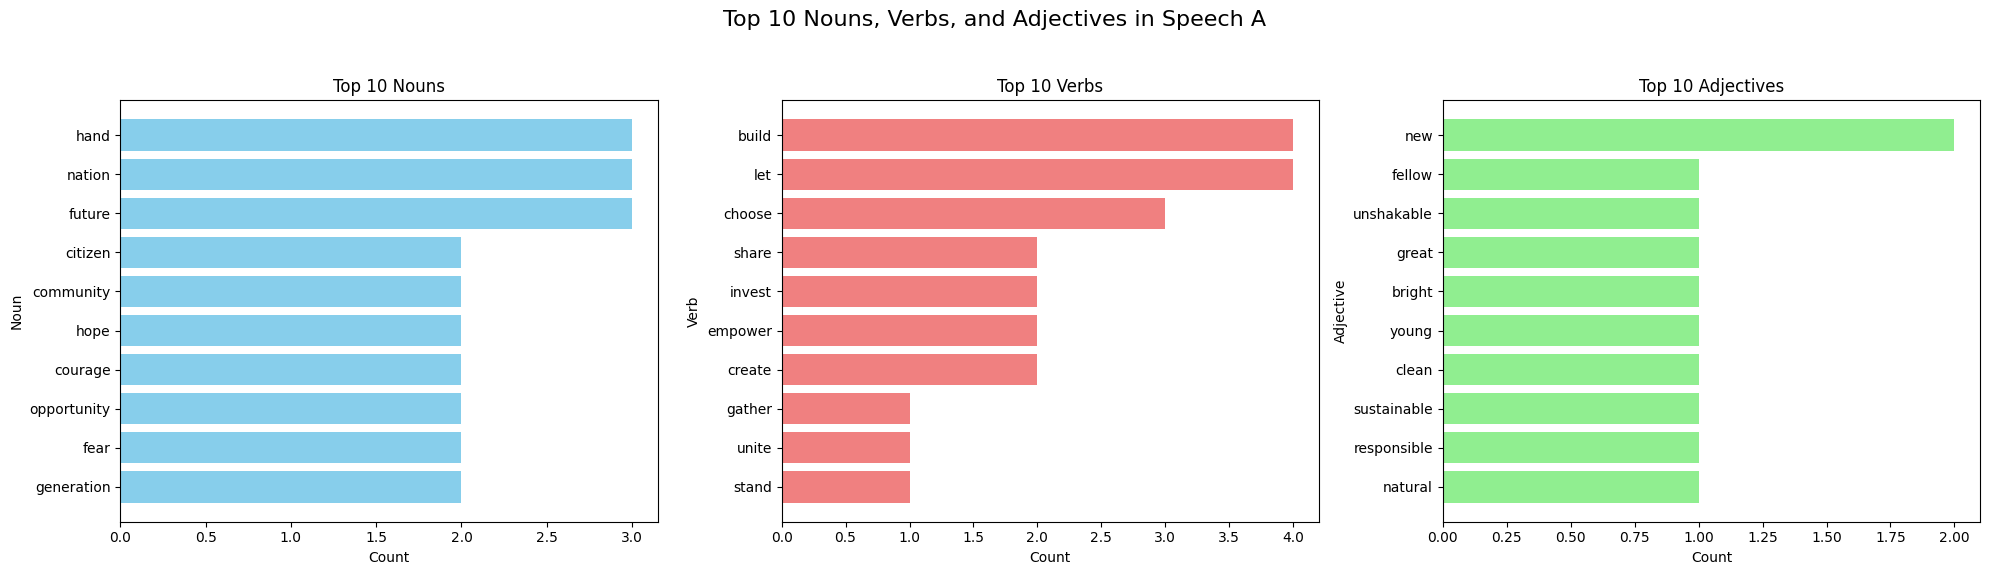

In [83]:
import matplotlib.pyplot as plt

# Plotting for Speech A
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Top 10 Nouns, Verbs, and Adjectives in Speech A', fontsize=16)

# Nouns for Speech A
axes[0].barh(df_nouns_A['Noun'], df_nouns_A['Count'], color='skyblue')
axes[0].set_title('Top 10 Nouns')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Noun')
axes[0].invert_yaxis()

# Verbs for Speech A
axes[1].barh(df_verbs_A['Verb'], df_verbs_A['Count'], color='lightcoral')
axes[1].set_title('Top 10 Verbs')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Verb')
axes[1].invert_yaxis()

# Adjectives for Speech A
axes[2].barh(df_adjectives_A['Adjective'], df_adjectives_A['Count'], color='lightgreen')
axes[2].set_title('Top 10 Adjectives')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Adjective')
axes[2].invert_yaxis()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


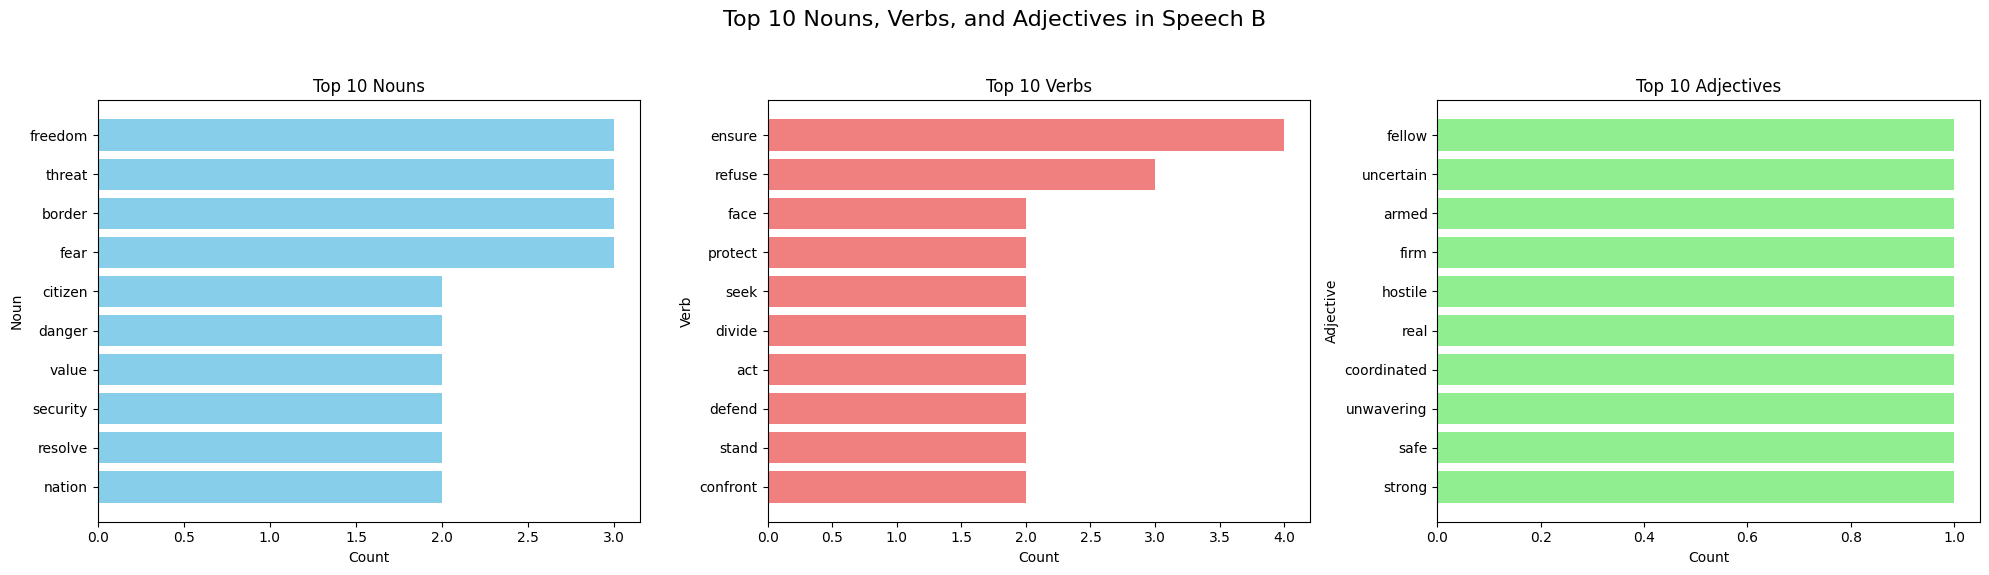

In [84]:
import matplotlib.pyplot as plt

# Plotting for Speech B
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Top 10 Nouns, Verbs, and Adjectives in Speech B', fontsize=16)

# Nouns for Speech B
axes[0].barh(df_nouns_B['Noun'], df_nouns_B['Count'], color='skyblue')
axes[0].set_title('Top 10 Nouns')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Noun')
axes[0].invert_yaxis()

# Verbs for Speech B
axes[1].barh(df_verbs_B['Verb'], df_verbs_B['Count'], color='lightcoral')
axes[1].set_title('Top 10 Verbs')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Verb')
axes[1].invert_yaxis()

# Adjectives for Speech B
axes[2].barh(df_adjectives_B['Adjective'], df_adjectives_B['Count'], color='lightgreen')
axes[2].set_title('Top 10 Adjectives')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Adjective')
axes[2].invert_yaxis()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Govor A je jasno usmjeren na pozitivnu viziju budućnosti, zajedništvo i izgradnju, koristeći afirmativan i nadahnjujući jezik. S druge strane, Govor B je defenzivniji i konfrontacijski, fokusirajući se na prijetnje, sigurnost i potrebu za zaštitom. Teme se drastično razlikuju, s jednim govorom koji dominira nadom i suradnjom, dok drugi dominira oprezom i borbom protiv opasnosti.